#### Assignment: To predict heart failure with Machinelearning techniques using DecisionTreeClassification model

### 1. Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import statsmodels.formula.api as smf
import sklearn as skl
from scipy import stats

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn import datasets
from pickle import dump
from pickle import load

### 2.  Importing dataset
The Dataset used in building this model was provides as a CSV file for an assignment at Decodr Technologies

In [3]:
hpdata=pd.read_csv('Heart Failure Prediction.csv')

### 3.Creating dataframe

In [4]:
hpdata_df=pd.DataFrame(data=hpdata)
hpdata

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


### 4. Initial Analysis

In [ ]:
#Data understanding

This machine learning model could help in estimating the probability of deaths caused by heart failure by taking in important features from the dataset and making predictions based on these features.
The dataset consists of 12 variables/features and 1 output target variable. Let us examine the role of each feature in determining if a person is likely to have heart failure or not:

Age: This variable shows the patient’s age
Anemia: is the decrease in red blood cells or hemoglobin
Creatinine_phosphokinase: is the level of creatine kinase in the blood. This enzyme is important for muscle function.
Diabetes: is a chronic disease that causes high blood sugar
Ejection fraction: is the percentage of blood leaving the heart at each contraction
High blood pressure: is blood pressure that is higher than normal
Platelets: are tiny blood cells that help your body form clots to stop bleeding
Serum creatinine: is the level of serum creatinine in the blood
Serum sodium: is the level of serum sodium in the blood
Sex: gender of the patient
Time: This captures the time of the event

Death event: which is the predictor variable

In [6]:
hpdata.head()# gives first five rows of dataset

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [7]:
hpdata.describe() # gives statistical data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [8]:
hpdata_df.shape# check for number of rows/columns

(299, 13)

In [9]:
hpdata_df.isna().sum()# check for null values

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [11]:
hpdata_df.dtypes #check datatypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [10]:
hpdata['DEATH_EVENT'].unique()

array([1, 0], dtype=int64)

In [12]:
hpdata_df.duplicated().any()# checking for duplicate values

False

### 5. Data Cleaning was not required

### 6.To visualize the distribution of the target variable (Death_event).
From the visualization, we can see that a greater number  of the patients had a failed heart

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'anaemia'}>,
        <AxesSubplot:title={'center':'creatinine_phosphokinase'}>,
        <AxesSubplot:title={'center':'diabetes'}>],
       [<AxesSubplot:title={'center':'ejection_fraction'}>,
        <AxesSubplot:title={'center':'high_blood_pressure'}>,
        <AxesSubplot:title={'center':'platelets'}>,
        <AxesSubplot:title={'center':'serum_creatinine'}>],
       [<AxesSubplot:title={'center':'serum_sodium'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'smoking'}>,
        <AxesSubplot:title={'center':'time'}>],
       [<AxesSubplot:title={'center':'DEATH_EVENT'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

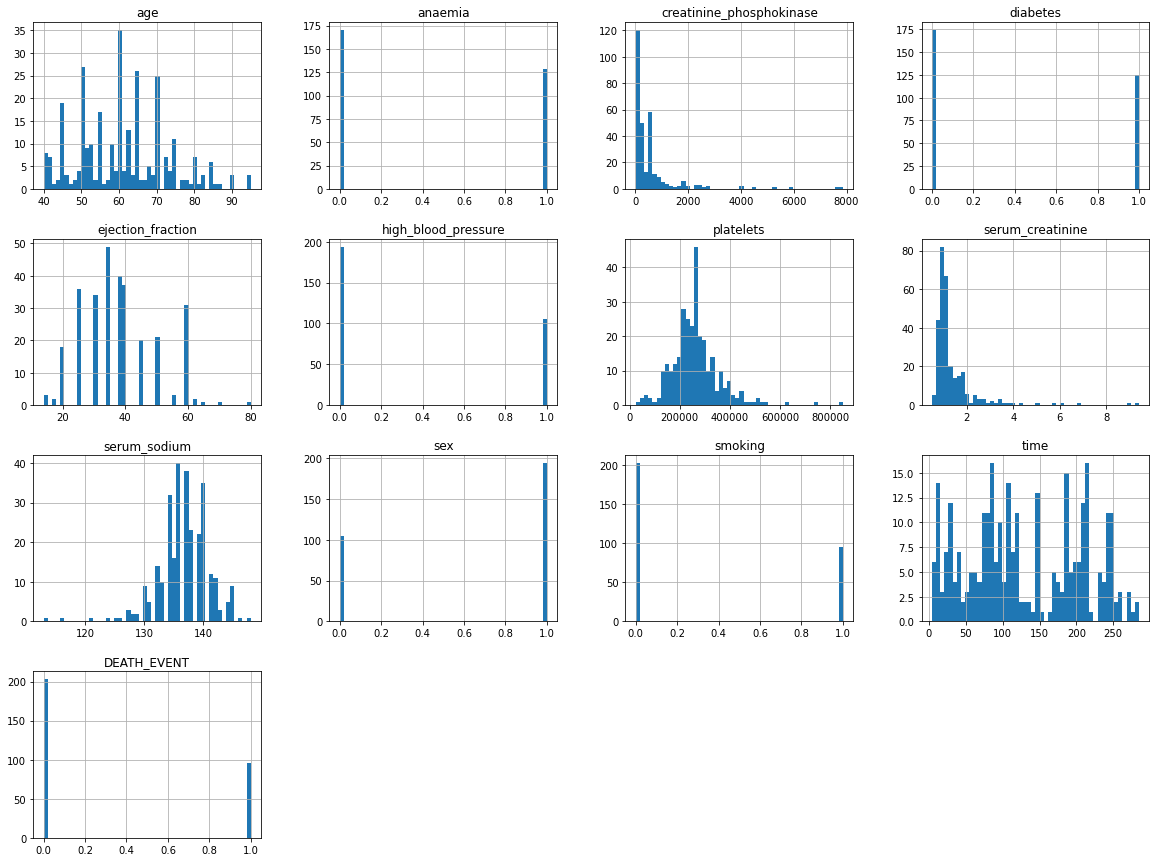

In [6]:
hpdata.hist(bins=50, figsize=(20,15))

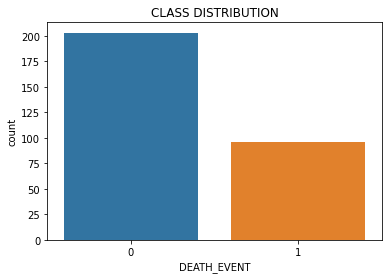

In [17]:
sns.countplot(x='DEATH_EVENT',data=hpdata_df)
plt.title('CLASS DISTRIBUTION')
plt.show()

###  7.Distribution of age feature to investigate how age is related to death event ,we can deduce that these two variables are positively correlated

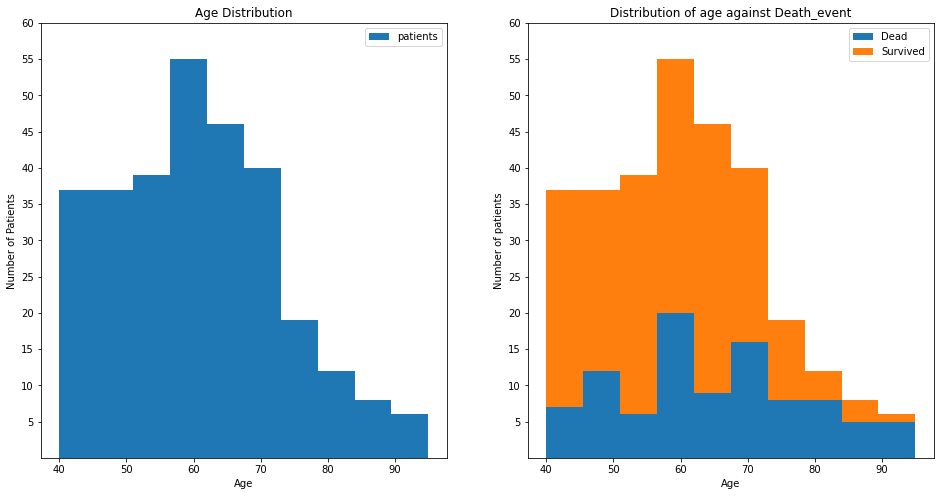

In [19]:
fig,ax = plt.subplots(1,2,figsize=(16,8))
ax[0].hist(hpdata_df['age'],label = 'patients')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Number of Patients')
ax[0].set_yticks([5,10,15,20,25,30,35,40,45,50,55,60])
ax[0].legend()
ax[0].set_title('Age Distribution')
ax[1].hist(x = [hpdata_df[hpdata_df['DEATH_EVENT']==1]['age'],hpdata_df[hpdata_df['DEATH_EVENT']==0]['age']],stacked=True,label=['Dead','Survived'])
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Number of patients')
ax[1].set_yticks([5,10,15,20,25,30,35,40,45,50,55,60])
ax[1].set_title('Distribution of age against Death_event')
ax[1].legend()

###  8. Heatmap, which gives a graphical representation of the relationship between the variables.

<AxesSubplot:>

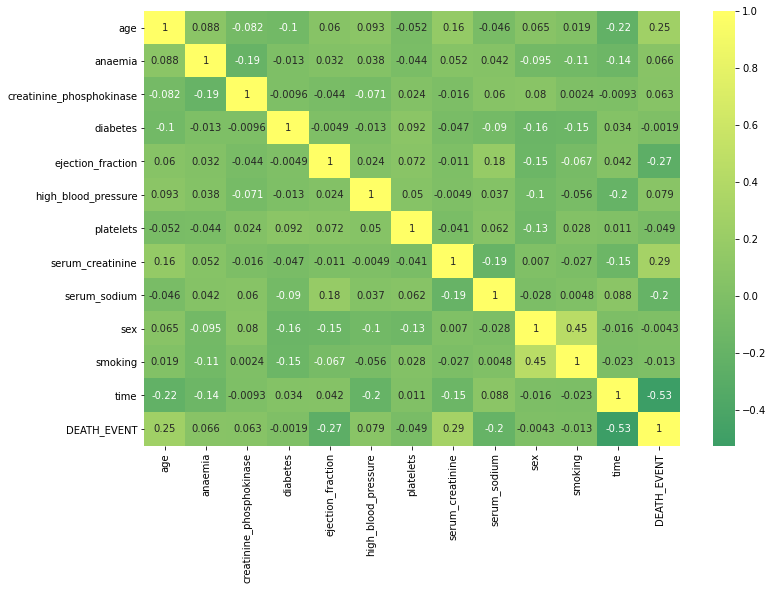

In [15]:
corr_matrix = hpdata.corr()
##plt.figure(figsize=[16,8])
fig,ax = plt.subplots(figsize=(12, 8))
##corr = sns.heatmap(hpdata_df.corr(), annot=True, cmap="YlOrRd")
##sns.heatmap(hpdata.corr(), cmap=sns.diverging_palette(240, 10, n=9), annot = True, ax = ax, center = 0)
sns.heatmap(hpdata.corr(), cmap="summer", annot = True, ax = ax, center = 0)

### 9. Creating training and testing data

In [23]:
x=hpdata_df.drop(labels='DEATH_EVENT',axis=1)
y=hpdata_df[['DEATH_EVENT']]

In [24]:
x

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280


In [25]:
y

,DEATH_EVENT
0,1
1,1
2,1
3,1
4,1
...,...
294,0
295,0
296,0
297,0


### 10. Splitting data into train and test data (75:25) using train test split

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=12,shuffle=True)

In [27]:
x_train.shape,y_train.shape

((224, 12), (224, 1))

In [28]:
x_test.shape,y_test.shape

((75, 12), (75, 1))

### 11. Data Preprocessing 
Ideally to be standardized, but not taken into account since plotting graph was giving straight line.

In [33]:
#scaler = StandardScaler()
#x_train = scaler.fit_transform(x_train)
#x_test = scaler.transform(x_test)

### 12.  Model selected =DecisionTreeClassifier  a non-parametric model 

### 12 a. Model building
DecisionTreeClassification models have been tried with  different hyper parameters 
    1.Gini max depth none
    2.Gini max depth 4 & 6
    3 Default hyperparameters for GridSearchCV
    4.Entropy with max depth 3
    5.Entropy with max depth 4.

GridSearchCV suggested criterion entropy and max depth of 3, yet max depth 4 has been has been chosen in this file, since the train accuracy score was higher than test accuracy score with max depth 4.

In [29]:
#criterion entropy, max depth as per GridSearchCV
dt_model4=DecisionTreeClassifier(criterion='entropy', max_depth=4,)

### 12 b. Model Training 

In [30]:
dt_model4.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

### 12 c Feature importances

In [39]:
featureimp=np.round(dt_model4.feature_importances_,decimals=2)
featureimp

array([0.08, 0.  , 0.1 , 0.  , 0.11, 0.  , 0.03, 0.15, 0.04, 0.  , 0.  ,
       0.48])

In [40]:
print("Feature importance of first model is as follows :\n Age {}  anaemia {} creatinine_phosphokinase {} diabetes {} \n ejection_fraction {} high_blood_pressure {} platelets {} \n serum_creatinine {} serum_sodium {} sex {} smoking {} time {}".format(0.08,0.,0.1,0.,0.11,0.,0.03,0.15,0.04,0.,0.,0.48)) 

Feature importance of first model is as follows :
 Age 0.08  anaemia 0.0 creatinine_phosphokinase 0.1 diabetes 0.0 
 ejection_fraction 0.11 high_blood_pressure 0.0 platelets 0.03 
 serum_creatinine 0.15 serum_sodium 0.04 sex 0.0 smoking 0.0 time 0.48


### 12 d. Plotting Decision tree with Root,nodes and leaf.

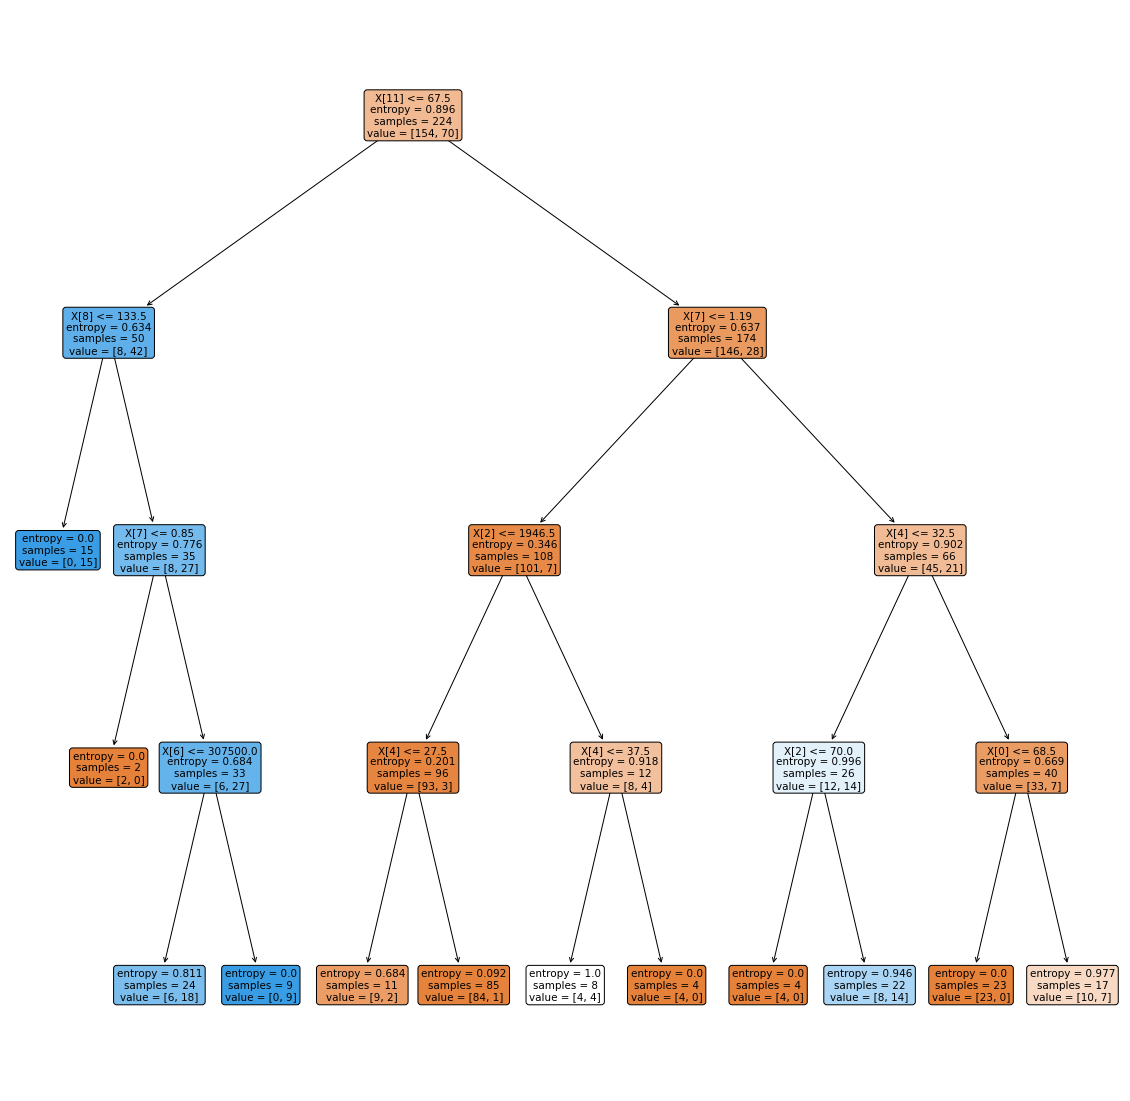

In [31]:
plt.figure(figsize=(20,20))
plot_tree(decision_tree=dt_model4,rounded=True,filled=True)
plt.show()

### 12 e.Model testing

In [32]:
y_pred_train4=dt_model4.predict(x_train)
y_pred_test4=dt_model4.predict(x_test)

### 12 f.Model evaluation 
Train data vs Test data using accuracy_score,confusion matrix and Classification Report,roc auc score

Model4 (Using Grid Search value entropy,maxdepth 3 & 4)
    #Max depth 4
        #Train_accuracy: 0.875
        #Test_accuracy: 0.8666666666666667
    #Max depth 3 
        #Train_accuracy4:0.8571428571428571
        #Test_accuracy4: 0.88

#### 12 f(1) Modelevaluation- Training data

In [102]:
print('Train_accuracy4:',accuracy_score(y_train,y_pred_train4))
print('Train_confmatr4:\n',confusion_matrix(y_train,y_pred_train4))
print('Train_Classrep4:\n',classification_report(y_train,y_pred_train4))

Train_accuracy4: 0.875
Train_confmatr4:
 [[140  14]
 [ 14  56]]
Train_Classrep4:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91       154
           1       0.80      0.80      0.80        70

    accuracy                           0.88       224
   macro avg       0.85      0.85      0.85       224
weighted avg       0.88      0.88      0.88       224



#### 12 f(2) Modelevaluation- Test data

In [104]:
print('Test_accuracy4:',accuracy_score(y_test,y_pred_test4))
print('Test_confmatr4:\n',confusion_matrix(y_test,y_pred_test4))
print('Test_Classrep4:\n',classification_report(y_test,y_pred_test4))

Test_accuracy4: 0.8666666666666667
Test_confmatr4:
 [[45  4]
 [ 6 20]]
Test_Classrep4:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90        49
           1       0.83      0.77      0.80        26

    accuracy                           0.87        75
   macro avg       0.86      0.84      0.85        75
weighted avg       0.87      0.87      0.87        75



##### 12 f (3) Pruning Model for overfitting aiming to reduce variance,by tweaking hyper parameter values to optimum value

In [88]:
#Trying to find the optimum hyperparameter
grid_search=GridSearchCV(estimator=dt_model3,
                         param_grid={'criterion' :['entropy','gini'],
                                     'max_depth'  :[3,4,5,6,7,8,9,10]},
                         cv=5)
grid_search.fit(x,y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10]})

In [89]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 3}

#### 12 f (4) Evaluation Roc values for separability of one class over another.. Receiver Operating Characteristic (ROC), Area under Curve (AUC)

In [34]:
fpr,tpr,thresholds=roc_curve(y,dt_model4.predict_proba (x)[:,1])
auc=roc_auc_score(y_train,y_pred_train4)
print(auc)

0.8545454545454545


### 13. Analysis of values as per DT model
13 a. Analysis of FPR (FALSE POSITIVE RATE) & TPR (TRUE POSITIVE RATE)

In [ ]:
TRAIN CLASS
[[140  14]   TN FP
 [ 14  56]]  FN TP

FPR= FP/ FP+TN 14/154= 0.09
TPR= TP/TP+FP 56/70 =0.80
============================================
TESTCLASS

[[45  4]  TN FP
 [ 6 20]] FN TP

FPR= FP/ FP+TN 4/49=0.08
TPR= TP/TP+FN 20/26=0.77

FP NEEDS TO BE LESSER AND TP HIGHER

#### 13 b.PLOT BETWEEN FPR & TPR

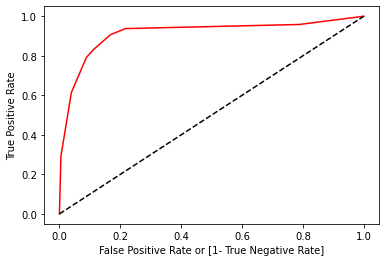

In [35]:
plt.plot(fpr,tpr,color='red',label='dt_model4 (area= %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1- True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

### 14. Model deployment with model 4, entropy,max depth 4

In [105]:
dump(dt_model4,open('hp_dt_class.pkl','wb'))

In [108]:
dt_model4_pkl=load(open('hp_dt_class.pkl','rb'))

In [109]:
dt_model4_pkl.predict(x_test)

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)